# Data Science Project 3

- Student Name: Natalya Doris
- Student Pace: Flex / 40 weeks
- Scheduled Project Review Date / Time: 
- Instructor Name: Abhineet Kulkarni
- Blog Post URL: 

## Import Statments & Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split, GridSearchCV, \
cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, \
BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, \
precision_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, \
MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

### Possible Data Sources

Startup data - predict success / failure
- https://www.kaggle.com/datasets/chhinna/crunchbase-data?select=round.csv
- https://www.kaggle.com/code/mohammadfikri/startup-success-prediction-precision-recall-94/data?select=startup+data.csv
- https://www.kaggle.com/datasets/arindam235/startup-investments-crunchbase

This dataset is too short, though nice and clean.

In [2]:
df1 = pd.read_csv('data/startup data.csv')
df1.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [3]:
print(df1.info())
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [4]:
df1['status'].value_counts()

acquired    597
closed      326
Name: status, dtype: int64

In [3]:
df2 = pd.read_csv('data/investments_VC.csv', encoding = "ISO-8859-1")
df2.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print(df2.info())
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,49438.000000,38482.000000,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,...,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.696205,2007.359129,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,1.888157e+06,6.541898e+04,1.628453e+05,...,3.845592e+04,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
std,1.294213,7.579203,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,1.382046e+08,6.582908e+05,5.612088e+06,...,3.864461e+06,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06
min,1.000000,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,18.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,...,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


In [7]:
df2['status'].value_counts()

operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64

In [8]:
df2['state_code'].value_counts()

CA    9917
NY    2914
MA    1969
TX    1466
WA     974
      ... 
MB      13
AK      12
NB       8
SK       4
PE       2
Name: state_code, Length: 61, dtype: int64

I am going to use this dataset, as it has many features I can play with and enough rows. It is also decently clean and interpretable from the start.

### Exploratory Analysis

In [711]:
data = df2
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [712]:
# getting rid of extra spaces in market and funding_total_usd
data = data.rename(columns={' market ': 'market', 
                            ' funding_total_usd ': 'funding_total_usd'})

In [594]:
data.isnull().sum()

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
market                   8824
funding_total_usd        4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

In [482]:
data['founded_at'].head()

0    2012-06-01
1           NaN
2    2012-10-26
3    2011-04-01
4    2014-01-01
Name: founded_at, dtype: object

In [12]:
data['region'].value_counts()

SF Bay Area      6804
New York City    2577
Boston           1837
London           1588
Los Angeles      1389
                 ... 
Wetzlar             1
West End            1
Enfield Lock        1
GTM - Other         1
Ilford              1
Name: region, Length: 1089, dtype: int64

In [171]:
data['city'].value_counts()

na                      5856
San Francisco           2576
New York                2291
London                  1227
Palo Alto                586
                        ... 
Cantemir                   1
Laupheim                   1
Richmond Upon Thames       1
Cave City                  1
Barrowford                 1
Name: city, Length: 4128, dtype: int64

In [172]:
data['state_code'].value_counts()

na    18573
CA     9732
NY     2858
MA     1937
TX     1436
      ...  
MB       13
AK       12
NB        8
SK        4
PE        2
Name: state_code, Length: 62, dtype: int64

In [173]:
data['country_code'].value_counts()

USA    28233
na      5066
GBR     2595
CAN     1351
CHN     1229
       ...  
LIE        1
JAM        1
UZB        1
MAF        1
MUS        1
Name: country_code, Length: 116, dtype: int64

In [13]:
data['secondary_market'].value_counts()

0.0            49419
200000000.0        1
7343789.0          1
20000000.0         1
12500000.0         1
126700000.0        1
680611554.0        1
400000000.0        1
63750000.0         1
19300000.0         1
4700000.0          1
78800355.0         1
210000000.0        1
2500000.0          1
156929.0           1
700000.0           1
7718867.0          1
6192396.0          1
210000.0           1
60000000.0         1
Name: secondary_market, dtype: int64

In [441]:
# inspecting market feature - lots of catgories
print("Number of unique markets: ", len(set(data['market'])))
#sum(data['market'].value_counts() == 5)
print("Markets with more than 200 companies: ",      
      str(sum(data['market'].value_counts() >= 200)))

Number of unique markets:  754
Markets with more than 200 companies:  39


<AxesSubplot:>

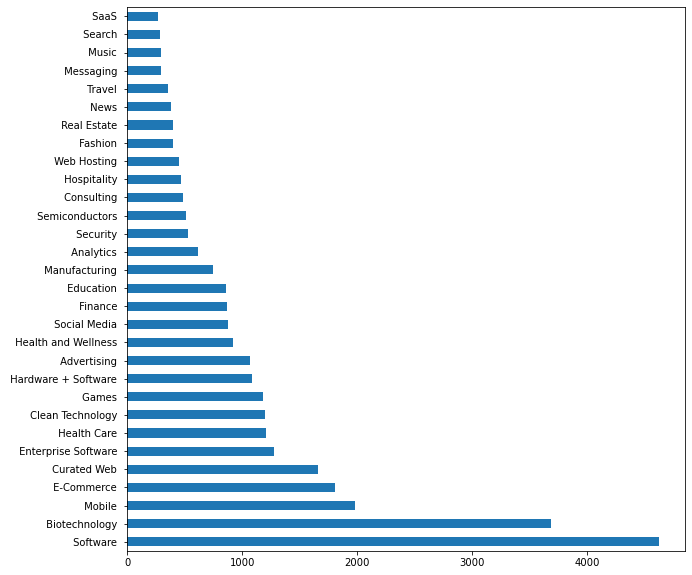

In [446]:
fig, ax = plt.subplots(figsize = (10,10))
data['market'].value_counts()[:30].plot(kind='barh')

In [444]:
# same with region
print("Number of unique regions: ", len(set(data['region'])))
#sum(data['region'].value_counts() == 5)
print("Regions with more than 200 companies: ",      
      str(sum(data['region'].value_counts() >= 200)))

Number of unique regions:  1090
Regions with more than 200 companies:  44


<AxesSubplot:>

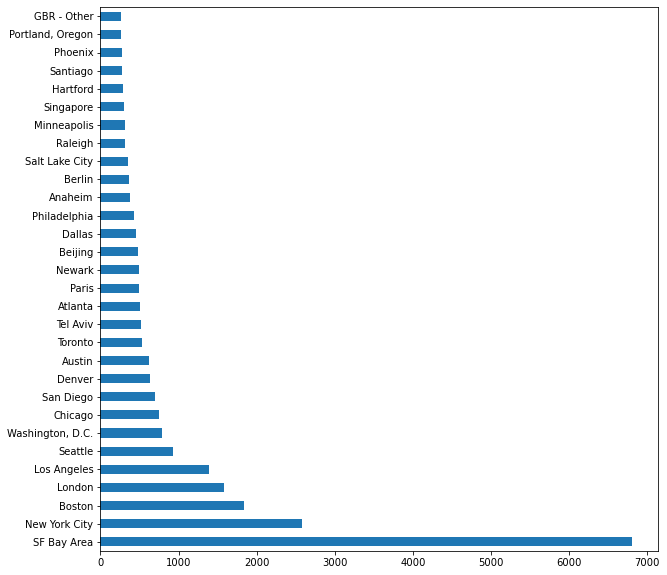

In [447]:
fig, ax = plt.subplots(figsize = (10,10))
data['region'].value_counts()[:30].plot(kind='barh')

In [14]:
# very few companies with post ipo equity
data['status'][data['post_ipo_equity'] > 0].value_counts()

operating    247
acquired       7
closed         2
Name: status, dtype: int64

In [15]:
# if a company got equity post ipo, that means they did not close
# therefore this variable probably not helpful to my model
data['status'][data['post_ipo_debt'] > 0].value_counts()

operating    59
acquired      2
Name: status, dtype: int64

In [16]:
data['founded_quarter'].value_counts()

2012-Q1    2904
2011-Q1    2768
2010-Q1    2259
2013-Q1    2206
2009-Q1    1852
           ... 
1988-Q2       1
1973-Q4       1
1919-Q2       1
1992-Q4       1
1939-Q1       1
Name: founded_quarter, Length: 218, dtype: int64

array([[<AxesSubplot:title={'center':'equity_crowdfunding'}>]],
      dtype=object)

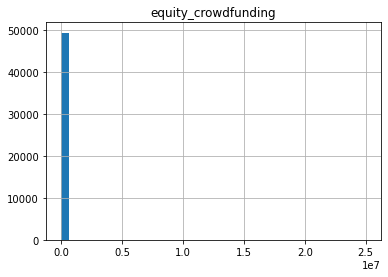

In [17]:
data.hist('equity_crowdfunding', bins=40)

### Preprocessing & Feature Engineering

In [485]:
data.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

Dropping irrelevant columns:

In [713]:
data = data.drop(columns=['permalink', 'homepage_url', 'category_list', 
                          'founded_month', 'founded_quarter', 'post_ipo_equity',  
                          'post_ipo_debt', 'secondary_market'],
                          #'first_funding_at', 'last_funding_at', 'founded_at'], 
                 axis=1)

Dropping duplicates, if any:

In [714]:
data = data.drop_duplicates()

#### Missing Values

Consider deleting rows with multiple missing columns????

In [715]:
data = data.dropna(subset=['status', 'name'])
data.isnull().sum()

name                        0
market                   3589
funding_total_usd           0
status                      0
country_code             5066
state_code              18573
region                   5066
city                     5856
funding_rounds              0
founded_at              10488
founded_year            10560
first_funding_at            0
last_funding_at             0
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
product_crowdfunding        0
round_A                     0
round_B                     0
round_C                     0
round_D                     0
round_E                     0
round_F                     0
round_G                     0
round_H                     0
dtype: int64

In [242]:
len(data)

48123

In [716]:
# filling categoricals
data = data.fillna(value={'market': 'other', 'country_code': 'other', 
                          'region': 'other', 'city': 'other', 
                          'state_code': 'other'})
#'founded_year': 0, 'founded_at': 'na'

Num of rows with 10th percentile of founded_year:  2000.0
3518


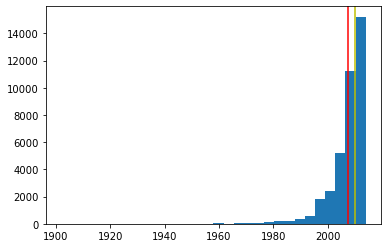

In [717]:
# distribution of non NA years 
plt.hist(data['founded_year'][~data['founded_year'].isnull()], bins=30)
plt.axvline(x=np.nanmean(data['founded_year']), color='r')
plt.axvline(x=np.nanmedian(data['founded_year']), color='y')

p10 = np.percentile(data['founded_year'][~data['founded_year'].isnull()], 10)
print("Num of rows with 10th percentile of founded_year: ", p10)

#10th percentile year is 2000, we will subset for startups founded on or after 2000
print(len(data[data['founded_year'] < 2000]))
data = data[data['founded_year'] >= 2000].reset_index(drop=True)

Date data - convert to datetime:

In [718]:
#format_date = ('founded_at','first_funding_at','last_funding_at')
#or i in format_date:
#  startup_df[i] = pd.to_datetime(startup_df[i], format = '%Y-%m-%d', errors = 'coerce')


data['founded_at'] = [datetime.strptime(day, '%Y-%m-%d') for day \
                      in data['founded_at'][~data['founded_at'].isnull()]]
data['first_funding_at'] = [datetime.strptime(day, '%Y-%m-%d').date() for day \
                            in data['first_funding_at']]
data['last_funding_at'] = [datetime.strptime(day, '%Y-%m-%d').date() for day \
                            in data['last_funding_at']]

In [719]:
data['founded_at'][0].date() - data['first_funding_at'][0]

datetime.timedelta(days=-29)

Fill year & founded_at with simple imputer, adjust founded quarter accordingly:

In [721]:
# since the data is skewed (see plot above), we will use median rather
# than mean

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

data['founded_year'] = imp_median.fit_transform(data[['founded_year']])
data['founded_at'] = imp_median.fit_transform(data[['founded_at']])
data['founded_at'] = pd.to_datetime(data['founded_at'])
data['founded_at'] = [day.date() for day in data['founded_at']]

data['founded_year'].value_counts()
data['founded_at'].value_counts()

## quarter
# if data['founded_at'].month < 4:
#     data['founded_quarter'] = 'Q1'
# elif (data['founded_at'].month >= 4) & (data['founded_at'].month < 7):
#     data['founded_quarter'] = 'Q2'
# elif (data['founded_at'].month >= 4) & (data['founded_at'].month < 7):
#     data['founded_quarter'] = 'Q3'
# else:
#     data['founded_quarter'] = 'Q4'

2012-01-01    2100
2011-01-01    2096
2010-01-01    1810
2009-01-01    1561
2013-01-01    1535
              ... 
2011-02-23       1
2007-01-11       1
2007-01-05       1
2005-11-19       1
2001-08-19       1
Name: founded_at, Length: 2935, dtype: int64

In [722]:
data.isna().sum()

name                    0
market                  0
funding_total_usd       0
status                  0
country_code            0
state_code              0
region                  0
city                    0
funding_rounds          0
founded_at              0
founded_year            0
first_funding_at        0
last_funding_at         0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
product_crowdfunding    0
round_A                 0
round_B                 0
round_C                 0
round_D                 0
round_E                 0
round_F                 0
round_G                 0
round_H                 0
dtype: int64

Basic data cleaning:

In [723]:
data.dtypes

name                     object
market                   object
funding_total_usd        object
status                   object
country_code             object
state_code               object
region                   object
city                     object
funding_rounds          float64
founded_at               object
founded_year            float64
first_funding_at         object
last_funding_at          object
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
product_crowdfunding    float64
round_A                 float64
round_B                 float64
round_C                 float64
round_D                 float64
round_E                 float64
round_F                 float64
round_G                 float64
round_H                 float64
dtype: o

In [724]:
# getting rid of extra spaces in market, city, state code, region
data['market'] = [x.strip() for x in data['market']]
data['country_code'] = [x.strip() for x in data['country_code']]
data['state_code'] = [x.strip() for x in data['state_code']]
data['region'] = [x.strip() for x in data['region']]
data['city'] = [x.strip() for x in data['city']]

In [631]:
# need to convert this data type to integer
data['funding_total_usd'].value_counts()

 -               5632
 10,00,000        627
 1,00,000         582
 5,00,000         573
 40,000           466
                 ... 
 3,89,652           1
 1,91,000           1
 3,33,333           1
 1,53,000           1
 5,70,16,500        1
Name: funding_total_usd, Length: 10560, dtype: int64

In [28]:
data['funding_total_usd'][8]

' -   '

In [725]:
data['funding_total_usd'] = [float(num.replace(" ", "0").replace(",", "0").\
                                 replace("-", "0")) 
                             for num in data['funding_total_usd']]
data['funding_total_usd'].value_counts()

0.000000e+00    5632
1.000000e+09     627
1.000000e+08     582
5.000000e+08     573
4.000000e+06     466
                ... 
4.012089e+11       1
1.003021e+11       1
1.003016e+11       1
1.003013e+11       1
1.909503e+09       1
Name: funding_total_usd, Length: 10560, dtype: int64

array([[<AxesSubplot:title={'center':'funding_total_usd'}>]], dtype=object)

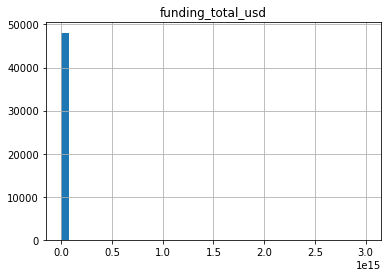

In [249]:
data.hist('funding_total_usd', bins=40) # lots of outliers

In [638]:
data['founded_quarter'].head()

0    Q2
1    Q4
2    Q2
3    Q1
4    Q1
Name: founded_quarter, dtype: object

In [726]:
#data['founded_quarter'] = [qtr[-2:] for qtr in data['founded_quarter']]
#data['founded_quarter'].head()

KeyError: 'founded_quarter'

In [727]:
data

,name,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,...,private_equity,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,News,1.705000e+09,acquired,USA,NY,New York City,New York,1.0,2012-06-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,'Rock' Your Paper,Publishing,4.000000e+06,operating,EST,other,Tallinn,Tallinn,1.0,2012-10-26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,(In)Touch Network,Electronics,1.500000e+09,operating,GBR,other,London,London,1.0,2011-04-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-R- Ranch and Mine,Tourism,6.000000e+06,operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0-6.com,Curated Web,2.000000e+09,operating,other,other,other,other,1.0,2007-01-01,...,0.0,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34040,Zyngenia,Biotechnology,2.050000e+11,operating,USA,MD,"Washington, D.C.",Gaithersburg,1.0,2008-01-01,...,0.0,0.0,25000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34041,Zynstra,Software,1.047050e+11,operating,GBR,other,Bath,Bath,4.0,2011-11-30,...,0.0,0.0,3800000.0,8400000.0,0.0,0.0,0.0,0.0,0.0,0.0
34042,Zytoprotec,Biotechnology,2.608606e+09,operating,AUT,other,Vienna,Gerasdorf Bei Wien,1.0,2007-01-01,...,0.0,0.0,2686600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34043,Zzish,Education,3.020000e+08,operating,GBR,other,London,London,1.0,2013-01-28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Correlations

Based on the below, the strongest correlations occur between debt_financing and funding_total_usd, round_H and round_G, followed by venture and all of the rounds of funding

Text(0.5, 1.0, 'Heatmap of Correlation Between Attributes (Including Status)')

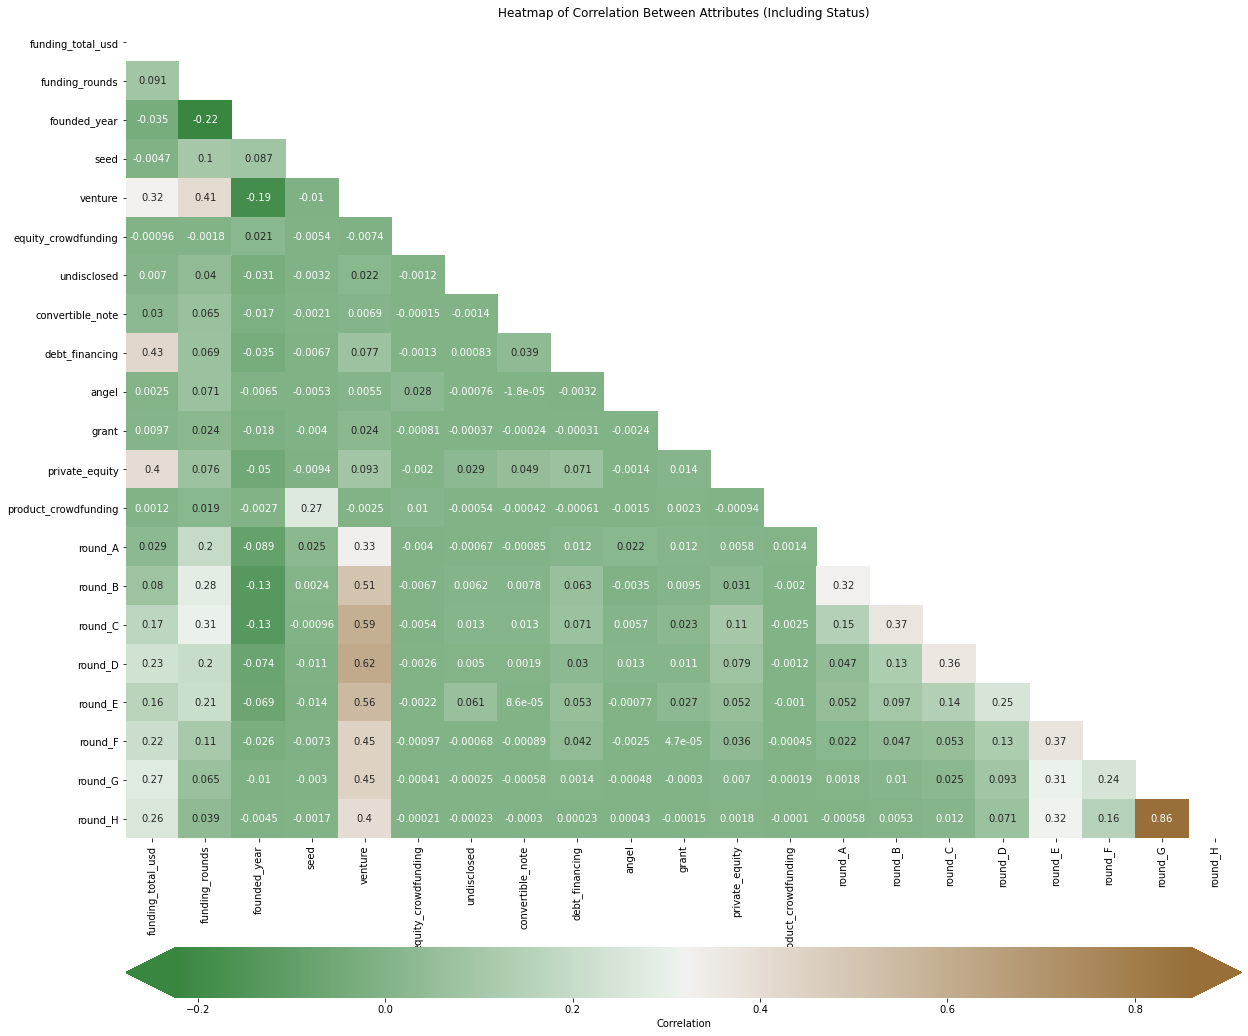

In [644]:
# with status
#heatmap_data = pd.concat([pd.Series(encoder.fit_transform(data['status'])), 
#                          data.drop('status', axis=1)], axis=1)

# without status
heatmap_data = data.drop('status', axis=1)

h_corr = heatmap_data.corr()
fig, ax = plt.subplots(figsize=(20, 20))
mask = np.triu(np.ones_like(h_corr, dtype=bool))
cmap = sns.diverging_palette(130, 50, as_cmap=True)
cbar_kws = {'label': 'Correlation', 'orientation': 'horizontal', 
            'pad': .1, 'extend': 'both'}
sns.heatmap(data=h_corr, mask=mask, ax=ax, annot=True, cbar_kws=cbar_kws, cmap=cmap)
ax.set_title('Heatmap of Correlation Between Attributes (Including Status)')

In [645]:
#data_corr=data.drop(columns=['status'], axis=1).corr()
corr = h_corr.abs().stack().reset_index().sort_values(0, ascending=False)
corr['pairs'] = list(zip(corr.level_0, corr.level_1))
corr.set_index(['pairs'], inplace = True)
corr.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
corr.columns = ['cc']
corr.drop_duplicates(inplace=True)

In [646]:
corr[(corr['cc'] > 0.6) & (corr['cc'] < 1)]

,cc
pairs,
"(round_H, round_G)",0.859849
"(round_D, venture)",0.615476


In [647]:
# dropping columns with correlation coefficient greater than 0.6
data = data.drop(columns=['venture', 'round_H'], axis=1)

#### Feature Engineering

In [572]:
data['international'] = [0 if country=='USA' else 1 for country in data['country_code']]

#### TEMP - Time to First Funding

In [656]:
data['first_funding_at']
#data['founded_at']
df2['first_funding_at']

0        2012-06-30
1        2010-06-04
2        2012-08-09
3        2011-04-01
4        2014-08-17
            ...    
54289           NaN
54290           NaN
54291           NaN
54292           NaN
54293           NaN
Name: first_funding_at, Length: 54294, dtype: object

In [729]:
(data['first_funding_at'][0]-data['founded_at'][0])/pd.Timedelta(days=365)

0.07945205479452055

In [745]:
# time elapsed between founding and first funding
#data['first_funding_at']
#data['last_funding_at']
#data['founded_at']

lst = []

for i in range(len(data)):
    x = (data['first_funding_at'][i].astype(float) - data['founded_at'][i].astype(float)) / pd.Timedelta(days=365)
    lst.append(x)
    
data['time_to_first_funding'] = lst
data['time_to_first_funding']

#data['age_first_funding'] = (data['first_funding_at']-data['founded_at'])/pd.Timedelta(days=365)
#data['age_last_funding'] = (data['last_funding_at']-data['founded_at'])/pd.Timedelta(days=365)
#data['founded_month'] = pd.DatetimeIndex(data['founded_at']).month
#data['founded_quarter'] = pd.DatetimeIndex(data['founded_at']).quarter



AttributeError: 'datetime.date' object has no attribute 'astype'

#### TEMP - Outliers

In [ ]:
# funding amount?
# year founded? 1995 or later?

#### TEMP - Investigating Funding total

In [ ]:
# what is funding total?
# other funding components?

#### OPTIONAL - Binary Representation of Funding Rounds

In [497]:
data['had_round_A'] = [0 if x==0 else 1 for x in data['round_A']]
data['had_round_B'] = [0 if x==0 else 1 for x in data['round_B']]
data['had_round_C'] = [0 if x==0 else 1 for x in data['round_C']]
data['had_round_D'] = [0 if x==0 else 1 for x in data['round_D']]
data['had_round_E'] = [0 if x==0 else 1 for x in data['round_E']]
data['had_round_F'] = [0 if x==0 else 1 for x in data['round_F']]
data['had_round_G'] = [0 if x==0 else 1 for x in data['round_G']]
data['had_venture'] = [0 if x==0 else 1 for x in data['venture']]
data['had_seed'] = [0 if x==0 else 1 for x in data['seed']]
data['had_eq_crowdfunding'] = [0 if x==0 else 1 for x in data['equity_crowdfunding']]
data['had_pd_crowdfunding'] = [0 if x==0 else 1 for x in data['product_crowdfunding']]
data['had_angel'] = [0 if x==0 else 1 for x in data['angel']]
data['had_grant'] = [0 if x==0 else 1 for x in data['grant']]
data['had_pe'] = [0 if x==0 else 1 for x in data['private_equity']]
data['had_convert'] = [0 if x==0 else 1 for x in data['convertible_note']]

#### X/Y Split

In [573]:
data.dtypes

name                     object
market                   object
funding_total_usd       float64
status                   object
country_code             object
state_code               object
region                   object
city                     object
funding_rounds          float64
founded_at               object
founded_quarter          object
founded_year            float64
first_funding_at         object
last_funding_at          object
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
angel                   float64
grant                   float64
private_equity          float64
product_crowdfunding    float64
round_A                 float64
round_B                 float64
round_C                 float64
round_D                 float64
round_E                 float64
round_F                 float64
round_G                 float64
international             int64
dtype: o

Splitting out X and Y for train-test split:

In [498]:
len(data[data['status']=='closed'])

2602

In [499]:
# removing irrelevant columns w/ obvious correlations, lack of insight
X = data.drop(columns=['status', 'name', 'country_code', 'state_code', 
                       'city', 'founded_quarter'], 
              axis=1)

# remove these if I go with binary version
#'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G'
#'undisclosed', 'angel' ,'grant', 'venture', 'equity_crowdfunding', 
# 'convertible_note', 'seed', 'private_equity', 'product_crowdfunding'

encoder = LabelEncoder()
y = pd.Series(encoder.fit_transform(data['status'])) 
# acquired is 0, closed is 1, operating is 2

# binary where 0 is acquired/operating(success), 1 is closed
y_bin = pd.Series([1 if val==1 else 0 for val in y])

In [500]:
print(y.value_counts())
y_bin.value_counts()

2    41829
0     3692
1     2602
dtype: int64


0    45521
1     2602
dtype: int64

In [16]:
#fig, ax = plt.subplots(figsize = (6,4))

# Plots #
    # Plot histogram
#X['region'].plot(kind = "hist", density = True, bins = 15) # change density to true, because KDE uses density
    # Plot KDE
#X['region'].plot(kind = "kde")

In [501]:
X.dtypes

market                  object
funding_total_usd      float64
region                  object
funding_rounds         float64
founded_year           float64
international            int64
had_round_A              int64
had_round_B              int64
had_round_C              int64
had_round_D              int64
had_round_E              int64
had_round_F              int64
had_round_G              int64
had_round_H              int64
had_venture              int64
had_seed                 int64
had_eq_crowdfunding      int64
had_pd_crowdfunding      int64
had_angel                int64
had_grant                int64
had_pe                   int64
had_debt_fin             int64
had_convert              int64
dtype: object

### Optional Adjustments - Market, Region, State Code

In [502]:
X['market'][X['market'].map(X['market'].value_counts()) < 1000] = 'other'
X['market'].value_counts()

other                  27838
Software                4527
Biotechnology           3588
Mobile                  1944
E-Commerce              1739
Curated Web             1630
Enterprise Software     1256
Health Care             1185
Clean Technology        1164
Games                   1161
Hardware + Software     1065
Advertising             1026
Name: market, dtype: int64

In [503]:
X['region'][X['region'].map(X['region'].value_counts()) < 1000] = 'other'
# combine na and low dens for 'other' category
X['region'].value_counts()

other            34179
SF Bay Area       6687
New York City     2528
Boston            1807
London            1554
Los Angeles       1368
Name: region, dtype: int64

### Train Test Split

In [506]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, random_state=42) 
#can use y for multiclass, #y_bin for binary

In [507]:
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# Same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 36092 rows and 23 columns
y_train is a Series with 36092 values


In [508]:
print(y_train.value_counts(normalize=True))

0    0.946692
1    0.053308
dtype: float64


In [509]:
X_train.columns

Index(['market', 'funding_total_usd', 'region', 'funding_rounds',
       'founded_year', 'international', 'had_round_A', 'had_round_B',
       'had_round_C', 'had_round_D', 'had_round_E', 'had_round_F',
       'had_round_G', 'had_round_H', 'had_venture', 'had_seed',
       'had_eq_crowdfunding', 'had_pd_crowdfunding', 'had_angel', 'had_grant',
       'had_pe', 'had_debt_fin', 'had_convert'],
      dtype='object')

### Preprocessing with Sklearn

Pipeline?

In [ ]:
pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("model", LogisticRegression())
])

pipe.fit(X_train, y_train)

Handle missing values:

In [ ]:
# Replace FireplaceQu NaNs with "N/A"s
#X_test["FireplaceQu"] = X_test["FireplaceQu"].fillna("N/A")

# Add missing indicator for lot frontage
#frontage_test = X_test[["LotFrontage"]]
#frontage_missing_test = missing_indicator.transform(frontage_test)
#X_test["LotFrontage_Missing"] = frontage_missing_test

# Impute missing lot frontage values
#frontage_imputed_test = imputer.transform(frontage_test)
#X_test["LotFrontage"] = frontage_imputed_test

# Check that there are no more missing values
#X_test.isna().sum()

All in one step --- skipping this for now

In [ ]:
# Scale continuous values using MinMaxScaler
scaler = MinMaxScaler()
X_train_cont = scaler.fit_transform(X_train_cont)
X_test_cont = scaler.transform(X_test_cont)

# Dummy encode categorical values using OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_cat = ohe.fit_transform(X_train_cat)
X_test_cat = ohe.transform(X_test_cat)

# Combine everything back together
X_train_preprocessed = np.concatenate([X_train_cont, X_train_cat.todense()], axis=1)
X_test_preprocessed = np.concatenate([X_test_cont, X_test_cat.todense()], axis=1)

Setting aside international feature as it is already processed:

In [166]:
train_int = X_train['international'].copy().reset_index(drop=True)
test_int = X_test['international'].copy().reset_index(drop=True)

Feature engineered categoricals:

In [510]:
X_train_cat_eng = X_train.select_dtypes(include=['int64']).reset_index(drop=True)
X_test_cat_eng = X_test.select_dtypes(include=['int64']).reset_index(drop=True)

Scale continuous variables using Min Max Scaler:

In [511]:
X_train.dtypes ## GET RID OF FUNDING QUARTER? UNUSUALLY LARGE COEFFICIENTS

market                  object
funding_total_usd      float64
region                  object
funding_rounds         float64
founded_year           float64
international            int64
had_round_A              int64
had_round_B              int64
had_round_C              int64
had_round_D              int64
had_round_E              int64
had_round_F              int64
had_round_G              int64
had_round_H              int64
had_venture              int64
had_seed                 int64
had_eq_crowdfunding      int64
had_pd_crowdfunding      int64
had_angel                int64
had_grant                int64
had_pe                   int64
had_debt_fin             int64
had_convert              int64
dtype: object

In [512]:
X_train_cont = X_train.select_dtypes(exclude=['object','int64']).reset_index(drop=True)
X_test_cont = X_test.select_dtypes(exclude=['object','int64']).reset_index(drop=True)

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform X_train
X_train_cont_scaled = scaler.fit_transform(X_train_cont)
X_train_cont_scaled = pd.DataFrame(X_train_cont_scaled, columns=X_train_cont.columns)

# Transform X_test
X_test_cont_scaled = scaler.transform(X_test_cont)
X_test_cont_scaled = pd.DataFrame(X_test_cont_scaled, columns=X_test_cont.columns)

One hot encode categorical variables:

In [513]:
#cat_columns = ['market', 'country_code', 'state_code', 'region', 
#               'city', 'founded_quarter']

cat_columns = ['market', 'region'] #, 'founded_quarter']

cat_train = X_train[cat_columns].reset_index(drop=True)
cat_test = X_test[cat_columns].reset_index(drop=True)

In [514]:
ohe = OneHotEncoder(handle_unknown = 'ignore')

encoded_train = ohe.fit_transform(cat_train).toarray()

X_train_cat = pd.DataFrame(encoded_train, columns=ohe.get_feature_names(cat_train.columns))

In [515]:
X_train_processed = pd.concat([X_train_cat, X_train_cont, X_train_cat_eng], axis=1)
X_train_scaled = pd.concat([X_train_cat, X_train_cont_scaled, X_train_cat_eng], axis=1) 

display(X_train_processed.head())
X_train_scaled.head()

,market_Advertising,market_Biotechnology,market_Clean Technology,market_Curated Web,market_E-Commerce,market_Enterprise Software,market_Games,market_Hardware + Software,market_Health Care,market_Mobile,...,had_round_H,had_venture,had_seed,had_eq_crowdfunding,had_pd_crowdfunding,had_angel,had_grant,had_pe,had_debt_fin,had_convert
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


,market_Advertising,market_Biotechnology,market_Clean Technology,market_Curated Web,market_E-Commerce,market_Enterprise Software,market_Games,market_Hardware + Software,market_Health Care,market_Mobile,...,had_round_H,had_venture,had_seed,had_eq_crowdfunding,had_pd_crowdfunding,had_angel,had_grant,had_pe,had_debt_fin,had_convert
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


#### TEMP - Correlation Check

In [414]:
df_corr=X_train_processed.corr()
#plt.figure(figsize=(25,25))
#sns.heatmap(data_corr,annot=True)
#plt.show()

In [418]:
#df_corr=X_train_processed.corr()
df_corr.head()

,market_3D,market_3D Printing,market_3D Technology,market_Accounting,market_Ad Targeting,market_Advanced Materials,market_Adventure Travel,market_Advertising,market_Advertising Exchanges,market_Advertising Networks,...,had_venture,had_seed,had_crowdfunding,had_angel,had_grant,had_pe,had_debt_fin,had_convert,had_eq_crowdfunding,had_pd_crowdfunding
market_3D,1.000000,-0.000336,-0.000284,-0.000402,-0.000402,-0.000180,-0.000254,-0.003527,-0.000180,-0.000254,...,-0.009036,0.020787,-0.002548,0.003026,-0.003623,-0.003961,-0.007390,-0.002612,-0.002548,-0.001548
market_3D Printing,-0.000336,1.000000,-0.000164,-0.000232,-0.000232,-0.000104,-0.000147,-0.002036,-0.000104,-0.000147,...,0.002755,-0.004251,-0.001471,-0.003656,-0.002092,-0.002286,-0.004266,-0.001508,-0.001471,0.030242
market_3D Technology,-0.000284,-0.000164,1.000000,-0.000196,-0.000196,-0.000088,-0.000124,-0.001721,-0.000088,-0.000124,...,-0.011144,0.003149,-0.001243,-0.003089,-0.001768,-0.001932,0.013211,0.020729,-0.001243,-0.000755
market_Accounting,-0.000402,-0.000232,-0.000196,1.000000,-0.000277,-0.000124,-0.000175,-0.002433,-0.000124,-0.000175,...,0.000911,0.004454,-0.001758,0.009190,-0.002500,0.007682,-0.005099,0.029317,-0.001758,-0.001068
market_Ad Targeting,-0.000402,-0.000232,-0.000196,-0.000277,1.000000,-0.000124,-0.000175,-0.002433,-0.000124,-0.000175,...,-0.002424,0.008162,-0.001758,0.015970,-0.002500,-0.002733,-0.005099,-0.001802,-0.001758,-0.001068


In [420]:
df = df_corr.abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']
df.drop_duplicates(inplace=True)

,cc
pairs,
"(region_Lucca, market_Groceries)",0.707097
"(region_Etobicoke, market_Swimming)",0.577334
"(region_Tasmania, market_Gold)",0.577334
"(region_Zafirovo, market_Insurance Companies)",0.499979
"(region_Busan, market_Shared Services)",0.499979
"(region_Orsay, market_Physical Security)",0.499972
"(market_Specialty Chemicals, region_NE - Other)",0.499972
"(had_round_A, had_venture)",0.496202
"(region_Levis, market_Digital Signage)",0.447189


In [ ]:
df[(df.cc>.3) & (df.cc<1)]

#### Transforming test data

In [333]:
X_test.dtypes

market                  object
funding_total_usd      float64
region                  object
funding_rounds         float64
founded_year           float64
international            int64
had_round_A              int64
had_round_B              int64
had_round_C              int64
had_round_D              int64
had_round_E              int64
had_round_F              int64
had_round_G              int64
had_round_H              int64
had_venture              int64
had_seed                 int64
had_crowdfunding         int64
had_angel                int64
had_grant                int64
had_pe                   int64
had_debt_fin             int64
had_convert              int64
had_eq_crowdfunding      int64
had_pd_crowdfunding      int64
dtype: object

In [516]:
encoded_test = ohe.transform(cat_test).toarray()

X_test_cat = pd.DataFrame(encoded_test, columns=ohe.get_feature_names(cat_test.columns))

X_test_scaled = pd.concat([X_test_cat, X_test_cont_scaled, X_test_cat_eng], axis=1)
X_test_processed = pd.concat([X_test_cat, X_test_cont, X_test_cat_eng], axis=1)

display(X_test_processed.head())
X_test_scaled.head()

,market_Advertising,market_Biotechnology,market_Clean Technology,market_Curated Web,market_E-Commerce,market_Enterprise Software,market_Games,market_Hardware + Software,market_Health Care,market_Mobile,...,had_round_H,had_venture,had_seed,had_eq_crowdfunding,had_pd_crowdfunding,had_angel,had_grant,had_pe,had_debt_fin,had_convert
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0


,market_Advertising,market_Biotechnology,market_Clean Technology,market_Curated Web,market_E-Commerce,market_Enterprise Software,market_Games,market_Hardware + Software,market_Health Care,market_Mobile,...,had_round_H,had_venture,had_seed,had_eq_crowdfunding,had_pd_crowdfunding,had_angel,had_grant,had_pe,had_debt_fin,had_convert
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0


In [517]:
print("There are {} features in train set".format(len(X_train_processed.columns)))
print("There are {} features in test set".format(len(X_test_processed.columns)))

There are 39 features in train set
There are 39 features in test set


In [518]:
print("There are {} features in train set (scaled)".format(len(X_train_scaled.columns)))
print("There are {} features in test set (scaled)".format(len(X_test_scaled.columns)))

There are 39 features in train set (scaled)
There are 39 features in test set (scaled)


### Feature Selection

In [520]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

X_50_best= SelectKBest(f_classif, k=10).fit(X_train_processed, y_train)
mask = X_50_best.get_support() #list of booleans for selected features
new_feat = [] 
for bool, feature in zip(mask, X_train_processed.columns):
    if bool:
        new_feat.append(feature)
print('The best features are:{}'.format(new_feat)) # The list of your 5 best features

The best features are:['market_Biotechnology', 'market_Curated Web', 'market_Games', 'market_other', 'funding_rounds', 'had_round_C', 'had_round_D', 'had_eq_crowdfunding', 'had_angel', 'had_pe']


In [ ]:
selector = VarianceThreshold()
reduced_feature_train = pd.DataFrame(selector.fit_transform(X_train_processed), 
                                     columns=X_poly_train.columns, 
                                     index=X_train_processed.index)


#reduced_feature_test = pd.DataFrame(selector.transform(X_poly_test), columns=X_poly_test.columns, index=X_poly_test.index)

In [340]:
X_train_scaled[X_train_scaled['region_Cadiz']==1]

,market_3D,market_3D Printing,market_3D Technology,market_Accounting,market_Ad Targeting,market_Advanced Materials,market_Adventure Travel,market_Advertising,market_Advertising Exchanges,market_Advertising Networks,...,had_venture,had_seed,had_crowdfunding,had_angel,had_grant,had_pe,had_debt_fin,had_convert,had_eq_crowdfunding,had_pd_crowdfunding
20986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
selector = SelectKBest(score_func=f_classif)
X_k_best_train = selector.fit_transform(X_poly_train, y_train)
X_k_best_test = selector.transform(X_poly_test)

## Baseline Model

Logistic regression:

In [521]:
baseline_model = LogisticRegression(random_state=42)

baseline_model.fit(X_train_scaled, y_train)

#baseline_model.score

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
#baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train, y_train, scoring="neg_log_loss")

#baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
#baseline_log_loss

LogisticRegression(random_state=42)

In [522]:
y_hat_train = baseline_model.predict(X_train_scaled)

In [523]:
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     34168
           1       0.00      0.00      0.00      1924

    accuracy                           0.95     36092
   macro avg       0.47      0.50      0.49     36092
weighted avg       0.90      0.95      0.92     36092



In [524]:
y_hat_test = baseline_model.predict(X_test_scaled)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11353
           1       0.00      0.00      0.00       678

    accuracy                           0.94     12031
   macro avg       0.47      0.50      0.49     12031
weighted avg       0.89      0.94      0.92     12031



In [278]:
print(recall_score(y_test, y_hat_test))

0.0


In [98]:
## WHAT IS THIS SAYING??
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))
#print(classification_report(y_test, y_hat_test))

0    31427
2     2758
1     1907
dtype: int64
------------------------------------
0    0.870747
2    0.076416
1    0.052837
dtype: float64


In [98]:
baseline_model.coef_

array([[-0.0434813 ,  0.17223978,  0.16558359, ..., -0.145476  ,
        -0.03072474, -0.11546924],
       [ 0.03745066, -0.23926031, -0.25030755, ...,  0.01065703,
        -0.00812474,  0.08794948],
       [ 0.00603065,  0.06702053,  0.08472396, ...,  0.13481897,
         0.03884948,  0.02751976]])

In [100]:
coef_df = pd.DataFrame(baseline_model.coef_, columns=X_train_scaled.columns)
coef_df.to_csv('coef_logreg_base4.csv')

In [101]:
X_train_scaled.columns

Index(['market_3D', 'market_Accounting', 'market_Ad Targeting',
       'market_Advertising', 'market_Advertising Platforms', 'market_Advice',
       'market_Aerospace', 'market_Agriculture', 'market_All Students',
       'market_Analytics',
       ...
       'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D',
       'round_E', 'round_F', 'round_G', 'round_H', 'international'],
      dtype='object', length=804)

In [525]:
def print_scores(y_train, y_hat_train, y_test, y_hat_test, binary=True):
    if binary:
        print('Training Recall: ', 
              recall_score(y_train, y_hat_train))
        print('Testing Recall: ', 
              recall_score(y_test, y_hat_test))
        print('\n')
        print('Training F1: ', 
              f1_score(y_train, y_hat_train))
        print('Testing F1: ', 
              f1_score(y_test, y_hat_test))
        print('\n')
        
    else:
        print('Training Recall (weighted avg): ', 
              recall_score(y_train, y_hat_train, average='weighted'))
        print('Testing Recall (weighted avg): ', 
              recall_score(y_test, y_hat_test, average='weighted'))
        print('\n')
        print('Training Recall (macro avg): ', 
              recall_score(y_train, y_hat_train, average='macro'))
        print('Testing Recall (macro avg): ', 
              recall_score(y_test, y_hat_test, average='macro'))
        print('\n')
        print('Training F1-Score (weighted avg): ', 
              f1_score(y_train, y_hat_train, average='weighted'))
        print('Testing F1-Score (weighted avg): ', 
              f1_score(y_test, y_hat_test, average='weighted'))
        print('\n')
        print('Training F1-Score (macro avg): ', 
              f1_score(y_train, y_hat_train, average='macro'))
        print('Testing F1-Score (macro avg): ', 
              f1_score(y_test, y_hat_test, average='macro'))
        print('\n')
    
    print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
    print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

In [286]:
print_scores(y_train, y_hat_train, y_test, y_hat_test)

Training Recall:  0.0
Testing Recall:  0.0


Training F1:  0.0
Testing F1:  0.0


Training Accuracy:  0.9466917876537737
Testing Accuracy:  0.9436455822458648


In [102]:
# print('Training Precision (weighted avg): ', 
#       precision_score(y_train, y_hat_train, average='weighted'))
# print('Testing Precision (weighted avg): ', 
#       precision_score(y_test, y_hat_test, average='weighted'))
# print('\n\n')

# print('Training Recall (weighted avg): ', 
#       recall_score(y_train, y_hat_train, average='weighted'))
# print('Testing Recall (weighted avg): ', 
#       recall_score(y_test, y_hat_test, average='weighted'))
# print('\n\n')

# print('Training F1-Score (weighted avg): ', 
#       f1_score(y_train, y_hat_train, average='weighted'))
# print('Testing F1-Score (weighted avg): ', 
#       f1_score(y_test, y_hat_test, average='weighted'))
# print('\n\n')

# print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
# print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

Training Precision (weighted avg):  0.8422235083821834
Testing Precision (weighted avg):  0.7710266272489164



Training Recall (weighted avg):  0.8707469799401529
Testing Recall (weighted avg):  0.8659296816557227



Training F1-Score (weighted avg):  0.8129091819813385
Testing F1-Score (weighted avg):  0.8053758639591745



Training Accuracy:  0.8707469799401529
Testing Accuracy:  0.8659296816557227


In [102]:
# print('Training Precision (macro avg): ', 
#       precision_score(y_train, y_hat_train, average='macro'))
# print('Testing Precision (macro avg): ', 
#       precision_score(y_test, y_hat_test, average='macro'))
# print('\n\n')

# print('Training Recall (macro avg): ', 
#       recall_score(y_train, y_hat_train, average='macro'))
# print('Testing Recall (macro avg): ', 
#       recall_score(y_test, y_hat_test, average='macro'))
# print('\n\n')

# print('Training F1-Score (macro avg): ', 
#       f1_score(y_train, y_hat_train, average='macro'))
# print('Testing F1-Score (macro avg): ', 
#       f1_score(y_test, y_hat_test, average='macro'))
# print('\n\n')

# print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
# print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

Training Precision (macro avg):  0.7142553584626755
Testing Precision (macro avg):  0.40010346229168975



Training Recall (macro avg):  0.33378279631804797
Testing Recall (macro avg):  0.3336305563548214



Training F1-Score (macro avg):  0.3111967979245121
Testing F1-Score (macro avg):  0.31027555733024664



Training Accuracy:  0.8698603568657874
Testing Accuracy:  0.8668439863685479


#### Multicollinearity - VIF

In [ ]:
## source: https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

X=df.drop(['Salary'],axis=1)
calculate_vif(X)

## Other Models

### Model 2: LogReg / Addressing Class Imbalance

In [526]:
# fitting a model weight balanced class weights, no regularization
logreg2 = LogisticRegression(random_state=42, class_weight='balanced')
logreg2.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [527]:
y_hat_train_2 = logreg2.predict(X_train_scaled)
y_hat_test_2 = logreg2.predict(X_test_scaled)

In [528]:
print_scores(y_train, y_hat_train_2, y_test, y_hat_test_2)

Training Recall:  0.5738045738045738
Testing Recall:  0.5707964601769911


Training F1:  0.1373988799004356
Testing F1:  0.14301552106430154


Training Accuracy:  0.6159259669732905
Testing Accuracy:  0.6144958856287923


In [529]:
print(classification_report(y_train, y_hat_train_2))
print(classification_report(y_test, y_hat_test_2))

              precision    recall  f1-score   support

           0       0.96      0.62      0.75     34168
           1       0.08      0.57      0.14      1924

    accuracy                           0.62     36092
   macro avg       0.52      0.60      0.45     36092
weighted avg       0.92      0.62      0.72     36092

              precision    recall  f1-score   support

           0       0.96      0.62      0.75     11353
           1       0.08      0.57      0.14       678

    accuracy                           0.61     12031
   macro avg       0.52      0.59      0.45     12031
weighted avg       0.91      0.61      0.72     12031



In [141]:
param_grid = {'penalty':['l1', 'l2', None],
              'solver':['lbfgs', 'newton-cg', 'sag'],
              'C': [1.0, 1e12],
              'class_weight': [None, 'balanced']
             }

In [143]:
# long runtime 1hr+
grid_logreg = GridSearchCV(baseline_model, param_grid, cv = 5, 
                           scoring='recall_macro') # macro or weighted
grid_logreg.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1.0, 1000000000000.0],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2', None],
                         'solver': ['lbfgs', 'newton-cg', 'sag']},
             scoring='recall_macro')

In [145]:
grid_logreg.best_params_

{'C': 1000000000000.0,
 'class_weight': 'balanced',
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [146]:
y_preds_grid_lr = grid_logreg.predict(X_test_scaled)
print(classification_report(y_test, y_preds_grid_lr))

              precision    recall  f1-score   support

           0       0.18      0.59      0.28       923
           1       0.10      0.47      0.16       678
           2       0.94      0.52      0.67     10430

    accuracy                           0.52     12031
   macro avg       0.40      0.52      0.37     12031
weighted avg       0.83      0.52      0.61     12031



In [530]:
# best model

logreg3 = LogisticRegression(random_state=42, class_weight='balanced', C=1e12, 
                             solver='newton-cg', penalty='l2')
logreg3.fit(X_train_scaled, y_train)
y_hat_train_3 = logreg3.predict(X_train_scaled)
y_hat_test_3 = logreg3.predict(X_test_scaled)

print_scores(y_train, y_hat_train_3, y_test, y_hat_test_3)
print(classification_report(y_train, y_hat_train_3))
print(classification_report(y_test, y_hat_test_3))

Training Recall:  0.5722453222453222
Testing Recall:  0.5737463126843658


Training F1:  0.1362961128992325
Testing F1:  0.14296214626975373


Training Accuracy:  0.6133769256344896
Testing Accuracy:  0.6123348017621145
              precision    recall  f1-score   support

           0       0.96      0.62      0.75     34168
           1       0.08      0.57      0.14      1924

    accuracy                           0.61     36092
   macro avg       0.52      0.59      0.44     36092
weighted avg       0.92      0.61      0.72     36092

              precision    recall  f1-score   support

           0       0.96      0.61      0.75     11353
           1       0.08      0.57      0.14       678

    accuracy                           0.61     12031
   macro avg       0.52      0.59      0.45     12031
weighted avg       0.91      0.61      0.72     12031



In [245]:
coef_df = pd.DataFrame(logreg3.coef_, columns=X_train_scaled.columns)
coef_df.to_csv('coef_logreg_3.csv')

### Model 3: Random Forest

In [531]:
rfc = RandomForestClassifier(random_state=42, class_weight='balanced') #, criterion='gini', max_depth=3, 
                             #min_samples_leaf=5)
rfc.fit(X_train_processed, y_train)

y_hat_train_3 = rfc.predict(X_train_processed)
y_hat_test_3 = rfc.predict(X_test_processed)

print_scores(y_train, y_hat_train_3, y_test, y_hat_test_3)
#print(classification_report(y_train, y_hat_train_3))
#print(classification_report(y_test, y_hat_test_3))


Training Recall:  0.9293139293139293
Testing Recall:  0.12094395280235988


Training F1:  0.6992569417285881
Testing F1:  0.12330827067669173


Training Accuracy:  0.9573866784883076
Testing Accuracy:  0.9030837004405287


#### Feature Selection

In [532]:
#sorted(rfc.feature_importances_, reverse=True)[:20]
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train_processed.columns, rfc.feature_importances_):
    feats[feature] = importance #add the name/value pair 

#importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
#importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)
    
feats_df = pd.DataFrame(feats.items())

In [533]:
feats_df.columns = ['col', 'feat_importance']
feats_df = feats_df.sort_values(by=['feat_importance'], ascending=False)
feats_df_20 = feats_df[:20]
feats_df_30 = feats_df[:30]

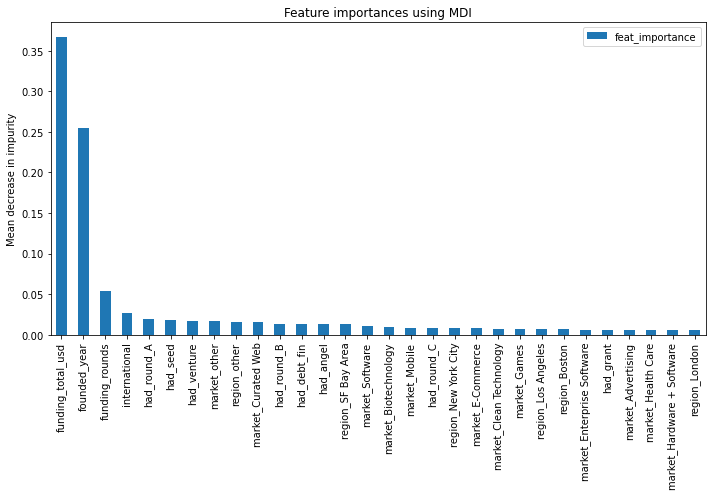

In [534]:
fig, ax = plt.subplots(figsize = (10,7))
feats_df_30.plot.bar(ax=ax) # yerr=std, 
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xticklabels(feats_df_30['col'])
fig.tight_layout()

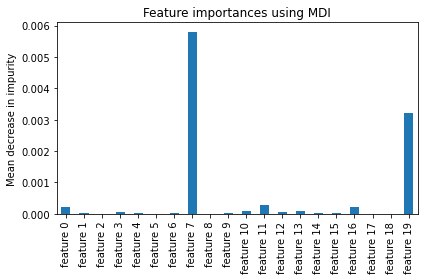

In [351]:
importances = rfc.feature_importances_[:20]
feature_names = [f"feature {i}" for i in range(X_train_processed.shape[1])][:20]
forest_importances = pd.Series(importances, index=feature_names)[:20]
#std = np.std([rfc.feature_importances_ for tree in rfc.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax) # yerr=std, 
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [108]:
# Tuning the model with grid search

param_grid = {'criterion':['gini','entropy','log_loss'],
              'max_depth':[3,8,12],
              'min_samples_leaf': [5,10],
              'class_weight': [None, 'balanced']
             }

In [110]:
## long run time

grid_rfc = GridSearchCV(rfc, param_grid, cv = 5, scoring='recall_macro') 
# macro or weighted?
grid_rfc.fit(X_train_processed, y_train) #17 min execution

KeyboardInterrupt: 

In [119]:
grid_rfc.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 5}

In [120]:
y_preds_grid = grid_rfc.predict(X_test)

In [121]:
display(confusion_matrix(y_test, y_preds_grid))
print(classification_report(y_test, y_preds_grid))

array([[    0,     0,   923],
       [    0,     0,   678],
       [    0,     0, 10430]])

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       923
           1       0.00      0.00      0.00       678
           2       0.87      1.00      0.93     10430

    accuracy                           0.87     12031
   macro avg       0.29      0.33      0.31     12031
weighted avg       0.75      0.87      0.81     12031



### Tree Models


#### Decision Tree Classifier

In [535]:
dtc = DecisionTreeClassifier(random_state=42) 
                             #min_samples_leaf=10, max_depth=5)
dtc.fit(X_train_processed, y_train)

y_hat_train_dtc = dtc.predict(X_train_processed)
y_hat_test_dtc = dtc.predict(X_test_processed)

print_scores(y_train, y_hat_train_dtc, y_test, y_hat_test_dtc)
print(classification_report(y_train, y_hat_train_dtc))
print(classification_report(y_test, y_hat_test_dtc))

Training Recall:  0.7255717255717256
Testing Recall:  0.08702064896755163


Training F1:  0.8369304556354916
Testing F1:  0.100169779286927


Training Accuracy:  0.9849274077357864
Testing Accuracy:  0.9118942731277533
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     34168
           1       0.99      0.73      0.84      1924

    accuracy                           0.98     36092
   macro avg       0.99      0.86      0.91     36092
weighted avg       0.98      0.98      0.98     36092

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     11353
           1       0.12      0.09      0.10       678

    accuracy                           0.91     12031
   macro avg       0.53      0.52      0.53     12031
weighted avg       0.90      0.91      0.91     12031



#### XGBoost

In [536]:
clf = XGBClassifier(random_state=42) ## long run time
clf.fit(X_train_processed, y_train)

y_hat_train_clf = clf.predict(X_train_processed)
y_hat_test_clf = clf.predict(X_test_processed)

print(classification_report(y_train, y_hat_train_clf))
print(classification_report(y_test, y_hat_test_clf))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     34168
           1       0.90      0.04      0.07      1924

    accuracy                           0.95     36092
   macro avg       0.93      0.52      0.52     36092
weighted avg       0.95      0.95      0.93     36092

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11353
           1       0.08      0.00      0.00       678

    accuracy                           0.94     12031
   macro avg       0.51      0.50      0.49     12031
weighted avg       0.90      0.94      0.92     12031



In [302]:
#y_hat_test_clf = clf.predict(X_test_processed)
#print(classification_report(y_test, y_hat_test_clf))

              precision    recall  f1-score   support

           0       0.46      0.05      0.09       923
           1       0.25      0.01      0.02       678
           2       0.87      0.99      0.93     10430

    accuracy                           0.87     12031
   macro avg       0.53      0.35      0.34     12031
weighted avg       0.80      0.87      0.81     12031



In [ ]:
## Can grid search to find ideal weights

# making it two dimensional rather than 3 dimensional?
# reducing number of categories in city / region? i.e. if less than x companies
# in city then include in 'other' category
# 5000 columns too many? what's a good guideline for knowing when there are
# too many parameters
# how much should I be feature engineering?

# business problem
# private equity company that wants to know when a startup will fail
# want to know warning signals if project is going to go badly

#### ExtraTrees

In [537]:
from sklearn.ensemble import ExtraTreesClassifier

ext = ExtraTreesClassifier(random_state=42, class_weight='balanced', 
                           min_samples_leaf=10, max_depth=5)
ext.fit(X_train_processed, y_train)

y_hat_train_ext = ext.predict(X_train_processed)
y_hat_test_ext = ext.predict(X_test_processed)

print(classification_report(y_train, y_hat_train_ext))
print(classification_report(y_test, y_hat_test_ext))

              precision    recall  f1-score   support

           0       0.96      0.71      0.82     34168
           1       0.08      0.48      0.14      1924

    accuracy                           0.70     36092
   macro avg       0.52      0.59      0.48     36092
weighted avg       0.91      0.70      0.78     36092

              precision    recall  f1-score   support

           0       0.96      0.71      0.82     11353
           1       0.09      0.48      0.15       678

    accuracy                           0.70     12031
   macro avg       0.52      0.60      0.49     12031
weighted avg       0.91      0.70      0.78     12031



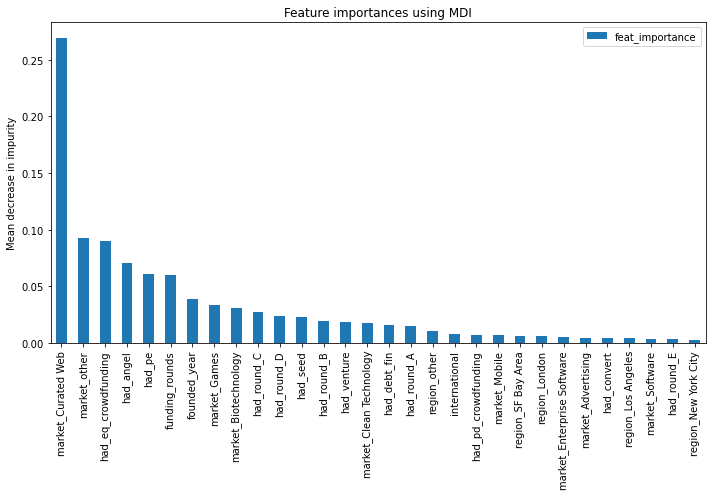

In [538]:
## Feature Selection

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train_processed.columns, ext.feature_importances_):
    feats[feature] = importance #add the name/value pair 

#importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
#importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)
    
feats_df = pd.DataFrame(feats.items())

feats_df.columns = ['col', 'feat_importance']
feats_df = feats_df.sort_values(by=['feat_importance'], ascending=False)
feats_df_20 = feats_df[:20]
feats_df_30 = feats_df[:30]

fig, ax = plt.subplots(figsize = (10,7))
feats_df_30.plot.bar(ax=ax) # yerr=std, 
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xticklabels(feats_df_30['col'])
fig.tight_layout()

In [299]:
param_grid = {'criterion':['gini','entropy','log_loss'],
              'max_depth':[3,8,12],
              'min_samples_leaf': [5,10,15],
              'class_weight': [None, 'balanced']
             }

In [300]:
ext = ExtraTreesClassifier(random_state=42)
ext.fit(X_train_processed, y_train)

ExtraTreesClassifier(random_state=42)

In [301]:
grid_ext = GridSearchCV(ext, param_grid, cv = 5, scoring='recall') 
grid_ext.fit(X_train_processed, y_train)
y_hat_train_gext = grid_ext.predict(X_train_processed)
y_hat_test_gext = grid_ext.predict(X_test_processed)

# 4 min execution not bad

In [304]:
grid_ext.best_estimator_

ExtraTreesClassifier(class_weight='balanced', criterion='entropy', max_depth=3,
                     min_samples_leaf=15, random_state=42)

In [ ]:
grid_ext.feature_im

In [302]:
print_scores(y_train, y_hat_train_gext, y_test, y_hat_test_gext)

Training Recall:  0.6081081081081081
Testing Recall:  0.6091445427728613


Training F1:  0.14148376564483947
Testing F1:  0.14755269739192567


Training Accuracy:  0.6065887177213787
Testing Accuracy:  0.6033579918543762


## Feature Selection

In [311]:
from sklearn.feature_selection import SelectKBest, chi2

X_5_best= SelectKBest(chi2, k=20).fit(X_train_scaled, y_train)
mask = X_5_best.get_support() #list of booleans for selected features
new_feat = [] 
for bool, feature in zip(mask, X_train_scaled.columns):
    if bool:
        new_feat.append(feature)
print('The best features are:{}'.format(new_feat)) # The list of your 5 best features

The best features are:['market_Advertising', 'market_Biotechnology', 'market_Curated Web', 'market_Games', 'market_Manufacturing', 'market_Messaging', 'market_Music', 'market_Search', 'market_Social Media', 'market_na', 'region_na', 'founded_quarter_Q1', 'founded_quarter_Q3', 'funding_rounds', 'had_round_C', 'had_round_D', 'had_crowdfunding', 'had_angel', 'had_pe', 'had_eq_crowdfunding']


In [308]:
## long runtime

from sklearn.feature_selection import RFE
estimator = logreg3
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X_train_scaled, y_train)
rfe_mask = selector.get_support() #list of booleans for selected features

new_features = [] 
for bool, feature in zip(rfe_mask, X_train_scaled.columns):
    if bool:
        new_features.append(feature)

new_features # The list of your 5 best features

KeyboardInterrupt: 

## Build Pipeline

In [ ]:
# Want to create a pipeline so we can test different kinds of models 
# more easly